<a href="https://colab.research.google.com/github/Alriyan1/yolov8_tutorial/blob/main/counting_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Sep 28 03:05:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)


In [ ]:
!pip install supervision


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.23.0


In [ ]:
MODEL = 'yolov8x.pt'

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:00<00:00, 247MB/s]


YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs


In [ ]:
import numpy as np
import supervision as sv

from ultralytics import YOLO
from supervision.assets import download_assets,VideoAssets

In [ ]:
download_assets(VideoAssets.VEHICLES)

  0%|          | 0/35345757 [00:00<?, ?it/s]

'vehicles.mp4'

In [ ]:
SOURCE_VIDEO=f"{HOME}/vehicles.mp4"

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source={SOURCE_VIDEO}

/content
100% 131M/131M [00:00<00:00, 226MB/s]
Ultralytics YOLOv8.2.102 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

WARNING ⚠️ NMS time limit 2.050s exceeded
video 1/1 (frame 1/538) /content/vehicle-counting.mp4: 384x640 3 cars, 1 truck, 164.1ms
video 1/1 (frame 2/538) /content/vehicle-counting.mp4: 384x640 3 cars, 1 truck, 76.5ms
video 1/1 (frame 3/538) /content/vehicle-counting.mp4: 384x640 4 cars, 2 trucks, 63.1ms
video 1/1 (frame 4/538) /content/vehicle-counting.mp4: 384x640 5 cars, 1 truck, 63.1ms
video 1/1 (frame 5/538) /content/vehicle-counting.mp4: 384x640 4 cars, 1 truck, 63.1ms
video 1/1 (frame 6/538) /content/vehicle-counting.mp4: 384x640 4 cars, 1 truck, 63.1ms
video 1/1 (frame 7/538) /content/vehicle-counting.mp4: 384x640 4 cars, 1 truck, 63.1ms
video 1/1 (frame 8/538) /content/vehicle-counting.mp4: 384x640 5 cars, 1 truck, 63.1ms
video 1/1 (frame 9/538) /content/vehic

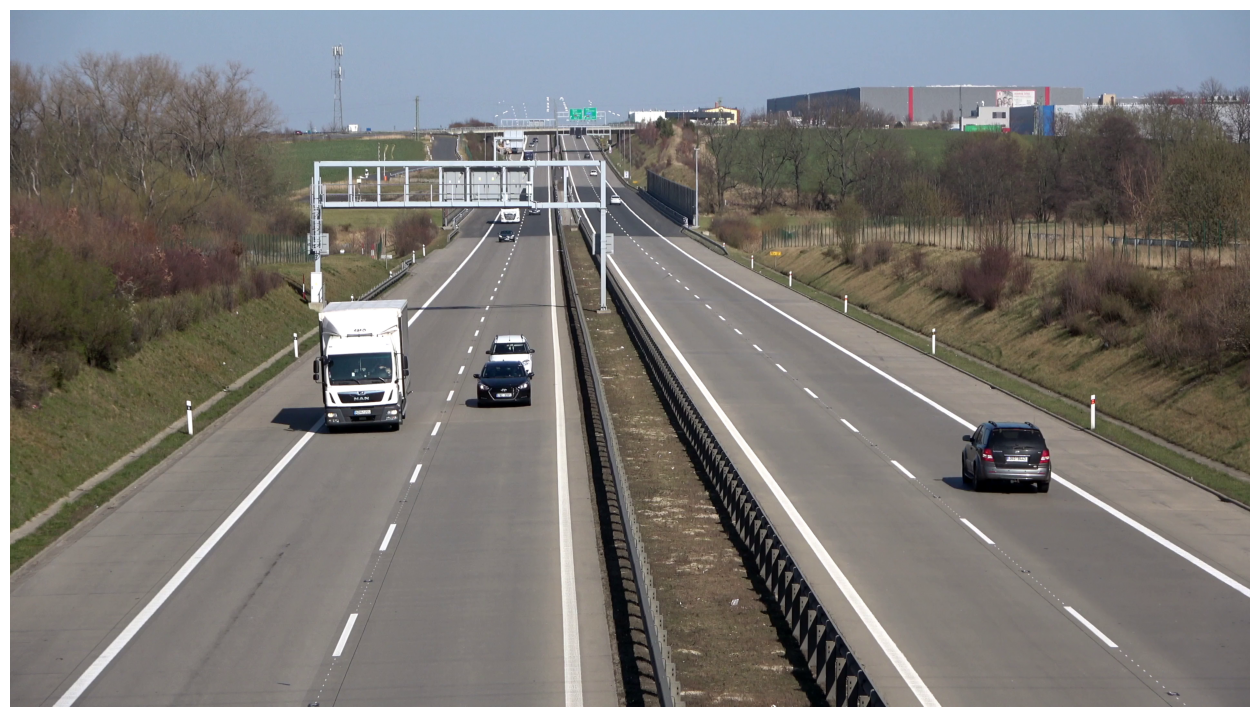

In [ ]:
generator = sv.get_video_frames_generator(SOURCE_VIDEO)
frame = next(generator)

sv.plot_image(frame, (16,16))

In [ ]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO)

VideoInfo(width=3840, height=2160, fps=25, total_frames=538)

In [ ]:
results = model(frame, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


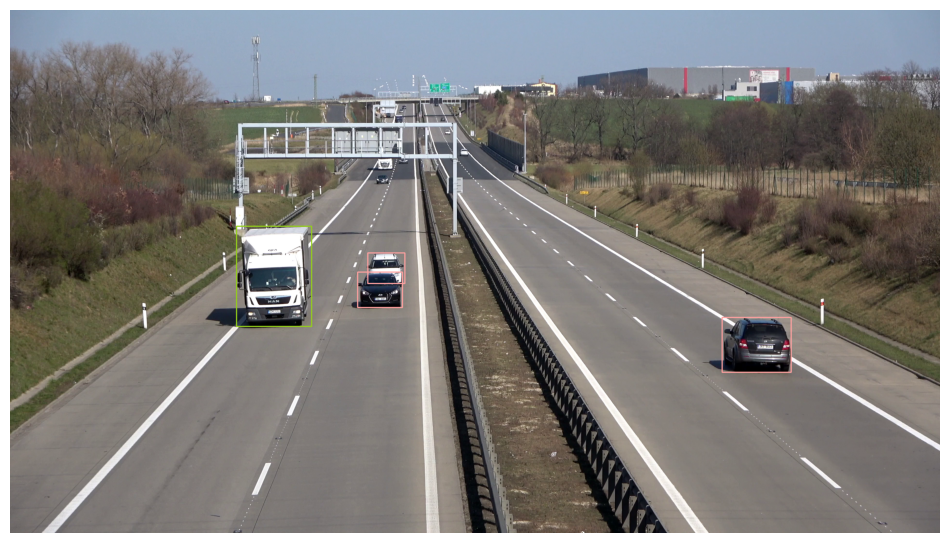

In [ ]:
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=4)
annotated_frame = bounding_box_annotator.annotate(frame.copy(),detections)

sv.plot_image(annotated_frame, (12,12))

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


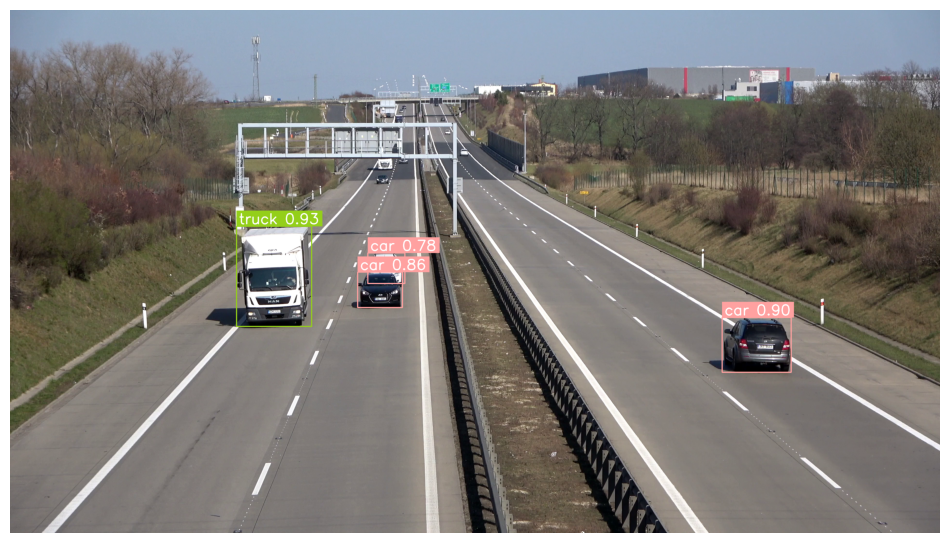

In [ ]:
labels = [
    f"{results.names[class_id]} {confidence:0.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4,text_scale=2)

annotated_frame = bounding_box_annotator.annotate(frame.copy(),detections)
annotated_frame= label_annotator.annotate(annotated_frame,detections,labels)

sv.plot_image(annotated_frame, (12,12))

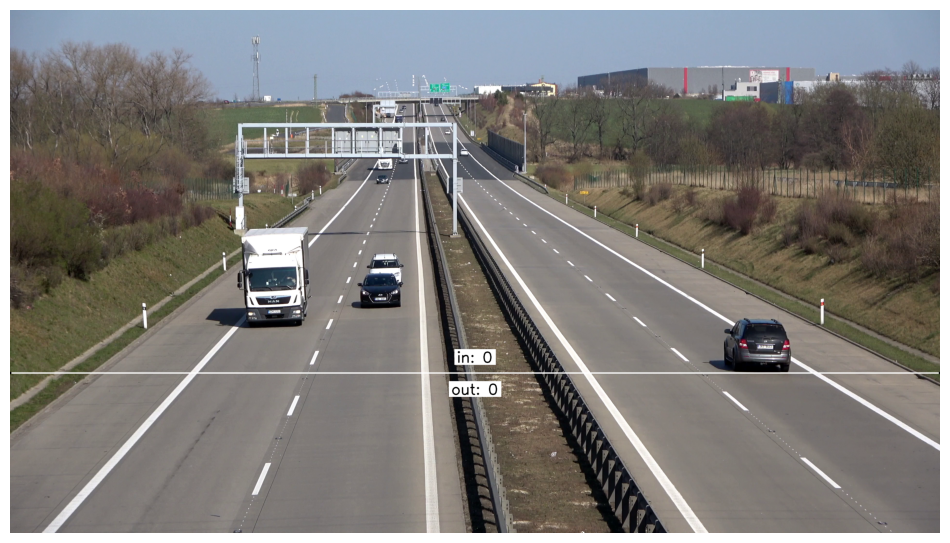

In [ ]:
START =  sv.Point(0,1500)
END = sv.Point(3840,1500)

line_zone = sv.LineZone(start=START,end=END)

line_zone_annotator = sv.LineZoneAnnotator(thickness=4,text_thickness=4,text_scale=2)

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame,line_counter=line_zone)

sv.plot_image(annotated_frame, (12,12))

In [ ]:
byte_tracker = sv.ByteTrack()

In [ ]:
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4,text_scale=2)
trace_annotator = sv.TraceAnnotator(thickness=4)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [ ]:
def callback(frame: np.ndarray, index: int)-> np.ndarray:
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = byte_tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]

    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(scene=annotated_frame, detections=detections)
    annotated_frame = bounding_box_annotator.annotate(scene=annotated_frame, detections=detections)
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections,labels=labels)

    line_zone.trigger(detections)

    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)


In [ ]:
TARGET_VIDEO_PATH = f"{HOME}/count-objects-crossing-the-line-results.mp4"

In [ ]:
sv.process_video(
    source_path=SOURCE_VIDEO,
    target_path=TARGET_VIDEO_PATH,
    callback=callback
)